In [ ]:
#import pandas as pd
#pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


# Objetivo de la sesión:
* Descargar datos de internet
* Crear gráficas
* Crear mapa



# Y el tema de hoy:


![link text](https://images.unsplash.com/photo-1585393054294-e234563512d4?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=703&q=80)

![stree](https://images.unsplash.com/photo-1592182811189-87f6ae2f3407?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1350&q=80)


# Reglas

![habla](https://images.unsplash.com/photo-1453738773917-9c3eff1db985?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1350&q=80)

# Análisis de datos de uso de transporte público  
Fuente de datos: 
* [Afluencia preliminar en transporte público](https://datos.cdmx.gob.mx/dataset/afluencia-preliminar-en-transporte-publico/resource/c2a29b87-0809-4448-90a2-158d8fc5d180)
Se utiliza esa versión debido a que es la mas actualizada
* [Histórico Ecobici](https://www.ecobici.cdmx.gob.mx/es/informacion-del-servicio/open-data)
* [Ubicaciones Cicloestaciones](https://datos.cdmx.gob.mx/dataset/d7e7267a-ade7-49a9-b5c7-dd6add20f79c/resource/f5f4e6c8-a2b1-4fb8-97be-df9b0f0dfb5d/download/ecobici_cicloestaciones.xlsx)


In [ ]:
### Cargar paquetes necesarios
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!ls 'gdrive/'

MyDrive


In [ ]:
!ls 'gdrive/My Drive/Personal/Platicas'

token_mb.txt


In [ ]:
f = open("gdrive/My Drive/Personal/Platicas/token_mb.txt", "r")
token = f.read()[:-1]

### Descargar datos

In [ ]:
url="https://datos.cdmx.gob.mx/dataset/da3fcf80-f15f-4478-9795-26eddaa6fe86/resource/c2a29b87-0809-4448-90a2-158d8fc5d180/download/___"
file=requests.get(url).content
file

b'"","id","organismo","linea_servicio","dia","fecha","afluencia_tarjeta","afluencia_boleto","afluencia_total"\n"1",25482,"Ecobici","N/A","Viernes","01-01-2021",NA,NA,2755\n"2",25483,"Ecobici","N/A","S\xc3\xa1bado","02-01-2021",NA,NA,4607\n"3",25484,"Ecobici","N/A","Domingo","03-01-2021",NA,NA,4492\n"4",25485,"Ecobici","N/A","Lunes","04-01-2021",NA,NA,7269\n"5",25486,"Ecobici","N/A","Martes","05-01-2021",NA,NA,7959\n"6",25487,"Ecobici","N/A","Mi\xc3\xa9rcoles","06-01-2021",NA,NA,7401\n"7",25488,"Ecobici","N/A","Jueves","07-01-2021",NA,NA,7722\n"8",25489,"Ecobici","N/A","Viernes","08-01-2021",NA,NA,7976\n"9",25490,"Ecobici","N/A","S\xc3\xa1bado","09-01-2021",NA,NA,6369\n"10",25491,"Ecobici","N/A","Domingo","10-01-2021",NA,NA,5347\n"11",25492,"Ecobici","N/A","Lunes","11-01-2021",NA,NA,8190\n"12",25493,"Ecobici","N/A","Martes","12-01-2021",NA,NA,8805\n"13",25494,"Ecobici","N/A","Mi\xc3\xa9rcoles","13-01-2021",NA,NA,8898\n"14",25495,"Ecobici","N/A","Jueves","14-01-2021",NA,NA,9171\n"15",254

In [ ]:
file.decode('utf-8')

'"","id","organismo","linea_servicio","dia","fecha","afluencia_tarjeta","afluencia_boleto","afluencia_total"\n"1",25482,"Ecobici","N/A","Viernes","01-01-2021",NA,NA,2755\n"2",25483,"Ecobici","N/A","Sábado","02-01-2021",NA,NA,4607\n"3",25484,"Ecobici","N/A","Domingo","03-01-2021",NA,NA,4492\n"4",25485,"Ecobici","N/A","Lunes","04-01-2021",NA,NA,7269\n"5",25486,"Ecobici","N/A","Martes","05-01-2021",NA,NA,7959\n"6",25487,"Ecobici","N/A","Miércoles","06-01-2021",NA,NA,7401\n"7",25488,"Ecobici","N/A","Jueves","07-01-2021",NA,NA,7722\n"8",25489,"Ecobici","N/A","Viernes","08-01-2021",NA,NA,7976\n"9",25490,"Ecobici","N/A","Sábado","09-01-2021",NA,NA,6369\n"10",25491,"Ecobici","N/A","Domingo","10-01-2021",NA,NA,5347\n"11",25492,"Ecobici","N/A","Lunes","11-01-2021",NA,NA,8190\n"12",25493,"Ecobici","N/A","Martes","12-01-2021",NA,NA,8805\n"13",25494,"Ecobici","N/A","Miércoles","13-01-2021",NA,NA,8898\n"14",25495,"Ecobici","N/A","Jueves","14-01-2021",NA,NA,9171\n"15",25496,"Ecobici","N/A","Viernes",

In [ ]:
url="https://datos.cdmx.gob.mx/dataset/da3fcf80-f15f-4478-9795-26eddaa6fe86/resource/c2a29b87-0809-4448-90a2-158d8fc5d180/download/___"
file=requests.get(url).content
df=pd.read_csv(io.StringIO(file.decode('utf-8')))

%matplotlib inline

In [ ]:
df.sample(10)

,Unnamed: 0,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total
1766,1767,19368,STE-Trolebús,L7 Lomas Estrella-CU,Miércoles,20-01-2021,NaN,NaN,7749.0
1725,1726,19327,STE-Trolebús,L6 Rosario-Chapultepec,Viernes,15-01-2021,NaN,NaN,6125.0
652,653,22551,RTP,Eco Atenea,Martes,26-01-2021,NaN,451.0,451.0
637,638,26279,RTP,SEFI Metro,Domingo,24-01-2021,2025.0,59217.0,61242.0
824,825,22705,RTP,Temporal Peñón-Panteón San Isidro-Metro Camarones,Domingo,14-02-2021,34.0,1011.0,1045.0
506,507,22420,RTP,Atenea,Domingo,10-01-2021,NaN,96.0,96.0
1084,1085,11548,STC,LB,Viernes,15-01-2021,NaN,NaN,234615.0
1554,1555,18818,STE-Tren Ligero,Xochimilco-Tasqueña,Viernes,01-01-2021,NaN,NaN,3142.0
488,489,22402,RTP,Ordinario,Viernes,08-01-2021,2560.0,93806.0,96366.0
779,780,22664,RTP,Expreso Directo,Martes,09-02-2021,124.0,812.0,936.0


In [ ]:
df.sample(50)

,Unnamed: 0,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total
1499,1500,11963,STC,L6,Viernes,19-02-2021,NaN,NaN,52651.0
744,745,22633,RTP,Temporal Peñón-Panteón San Isidro-Metro Camarones,Viernes,05-02-2021,64.0,1036.0,1100.0
125,126,16145,Metrobús,L2,Lunes,11-01-2021,NaN,NaN,114761.0
1356,1357,11820,STC,L7,Domingo,07-02-2021,NaN,NaN,49182.0
473,474,22387,RTP,Expreso,Miércoles,06-01-2021,3719.0,37869.0,41588.0
693,694,22587,RTP,Expreso,Domingo,31-01-2021,716.0,16030.0,16746.0
715,716,22607,RTP,Eco Atenea,Martes,02-02-2021,NaN,407.0,407.0
1156,1157,11620,STC,LB,Jueves,21-01-2021,NaN,NaN,218451.0
1539,1540,12003,STC,LA,Lunes,22-02-2021,NaN,NaN,173412.0
1342,1343,11806,STC,L5,Sábado,06-02-2021,NaN,NaN,117426.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2119 non-null   int64  
 1   id                 2119 non-null   int64  
 2   organismo          2119 non-null   object 
 3   linea_servicio     2065 non-null   object 
 4   dia                2119 non-null   object 
 5   fecha              2119 non-null   object 
 6   afluencia_tarjeta  362 non-null    float64
 7   afluencia_boleto   462 non-null    float64
 8   afluencia_total    2072 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 149.1+ KB


In [ ]:
df.sample(df.shape[0], random_state = 20).iloc[1:10,6:9]

,afluencia_tarjeta,afluencia_boleto,afluencia_total
1771,NaN,NaN,9749.0
1860,NaN,NaN,5993.0
2105,NaN,NaN,73314.0
479,164.0,2945.0,3109.0
700,2090.0,47943.0,50033.0
1366,NaN,NaN,120171.0
1792,NaN,NaN,33996.0
65,NaN,NaN,66471.0
1461,NaN,NaN,38532.0


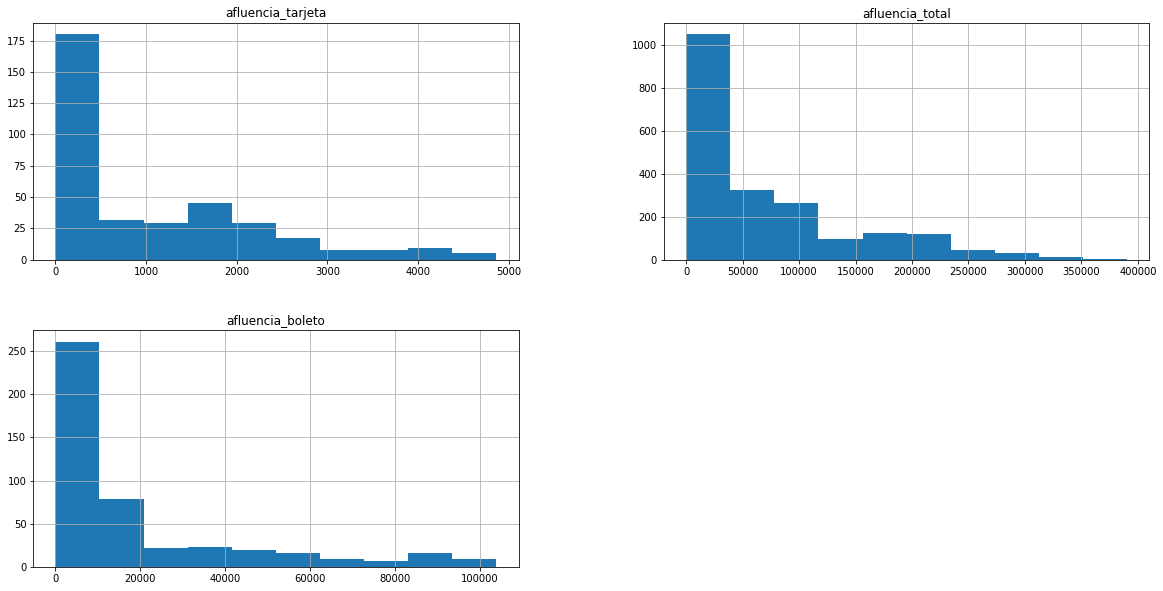

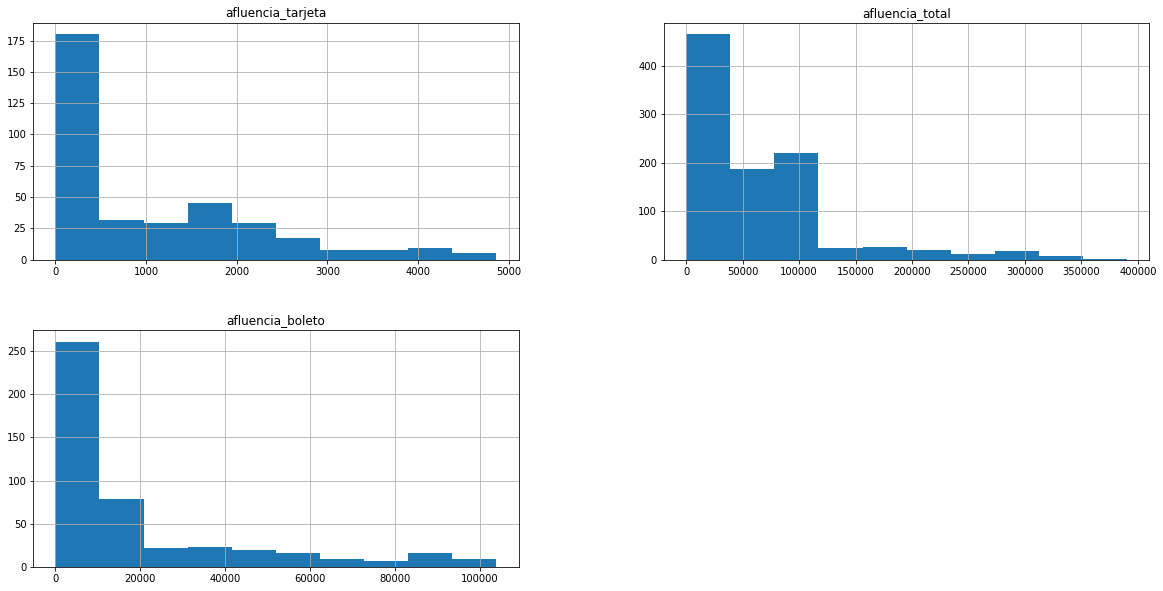

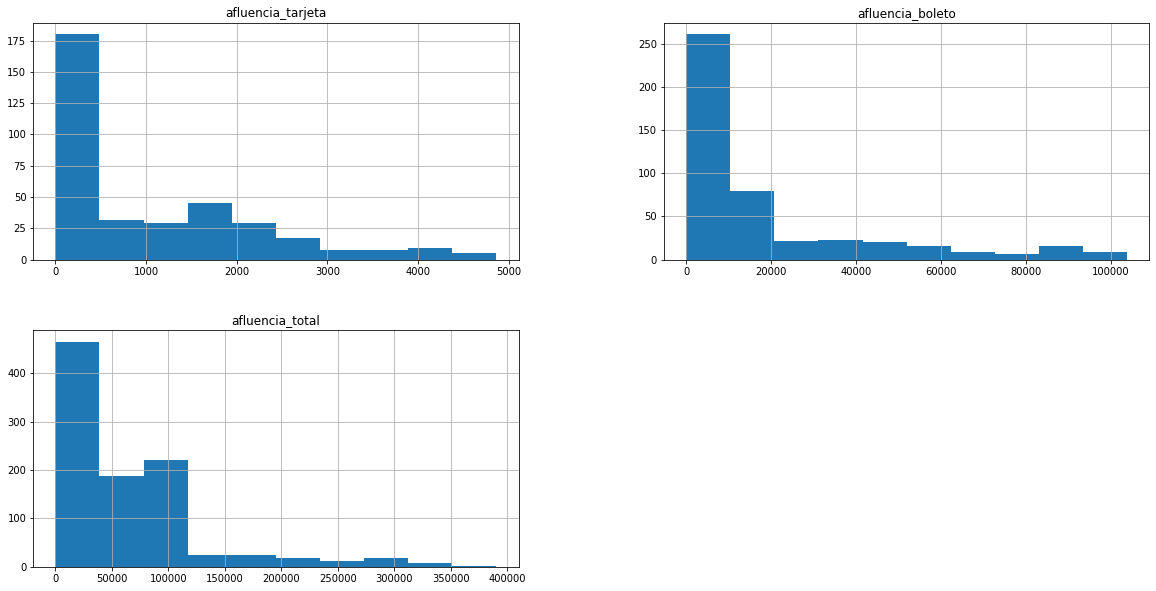

In [ ]:
df[["afluencia_tarjeta", "afluencia_total", "afluencia_boleto", "organismo"]].hist(figsize=(20, 10));
df.loc[:1000,["afluencia_tarjeta", "afluencia_total", "afluencia_boleto"]].hist(figsize=(20, 10));
df.iloc[:1000,6:9].hist(figsize=(20, 10));


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'organismo', 'linea_servicio', 'dia', 'fecha',
       'afluencia_tarjeta', 'afluencia_boleto', 'afluencia_total'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0             int64
id                     int64
organismo             object
linea_servicio        object
dia                   object
fecha                 object
afluencia_tarjeta    float64
afluencia_boleto     float64
afluencia_total      float64
dtype: object

In [ ]:
variables_string = [variable for variable, tipo in zip(df.columns, df.dtypes) if tipo == object]
variables_string

['organismo', 'linea_servicio', 'dia', 'fecha']

In [ ]:
df['organismo'].nunique()

7

In [ ]:
df['organismo'].unique()

array(['Ecobici', 'Metrobús', 'RTP', 'STC', 'STE-Tren Ligero',
       'STE-Trolebús', 'Suburbano'], dtype=object)

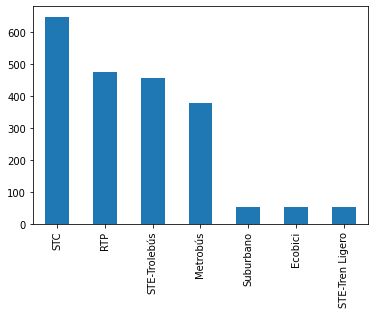

In [ ]:
df['organismo'].value_counts().plot.bar()

In [ ]:
df['organismo'].value_counts().index

Index(['STC', 'RTP', 'STE-Trolebús', 'Metrobús', 'Suburbano', 'Ecobici',
       'STE-Tren Ligero'],
      dtype='object')

In [ ]:
 df['organismo'].value_counts().values

array([648, 474, 457, 378,  54,  54,  54])

<BarContainer object of 7 artists>

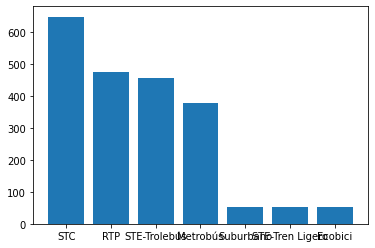

In [ ]:
plt.bar(['STC', 'RTP', 'STE-Trolebús', 'Metrobús', 'Suburbano',
       'STE-Tren Ligero', 'Ecobici'],[648, 474, 457, 378,  54,  54,  54])

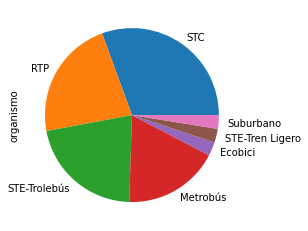

In [ ]:
df['organismo'].value_counts().plot.pie();


In [ ]:
df["linea_servicio"].nunique()

33

organismo
organismo


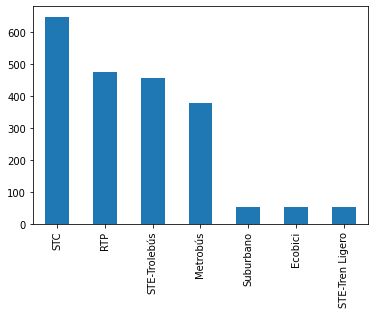

linea_servicio
linea_servicio


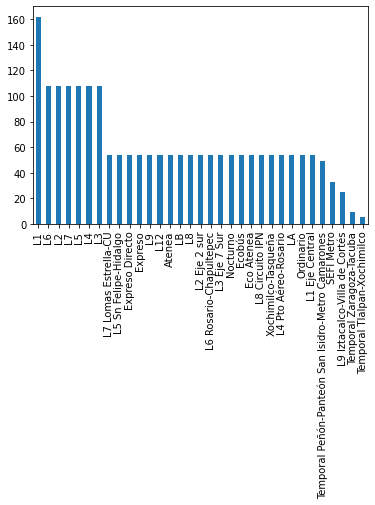

dia
dia


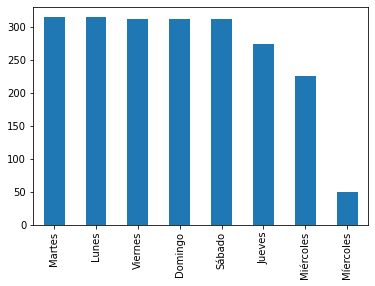

fecha


In [ ]:
variables_string = [variable for variable, tipo in zip(df.columns, df.dtypes) if tipo == object]
for c_variable in variables_string:
  print(c_variable)
  if df[c_variable].nunique() <34:
    print(c_variable)
    df[c_variable].value_counts().plot.bar()
    plt.show()

### Valores ausentes

In [ ]:
df.isnull().sum(axis = 0)

Unnamed: 0              0
id                      0
organismo               0
linea_servicio         54
dia                     0
fecha                   0
afluencia_tarjeta    1757
afluencia_boleto     1657
afluencia_total        47
dtype: int64

In [ ]:
df.shape

(2119, 9)

In [ ]:
df.isnull().sum() / df.shape[0]

Unnamed: 0           0.000000
id                   0.000000
organismo            0.000000
linea_servicio       0.025484
dia                  0.000000
fecha                0.000000
afluencia_tarjeta    0.829165
afluencia_boleto     0.781973
afluencia_total      0.022180
dtype: float64

In [ ]:
df.mean()

Unnamed: 0            1060.000000
id                   17665.704106
afluencia_tarjeta     1017.309392
afluencia_boleto     17839.746753
afluencia_total      67044.174228
dtype: float64

¿Por qué hay tantos valores ausentes?

In [ ]:
df[df["afluencia_tarjeta"].isnull()].organismo.value_counts()

STC                648
STE-Trolebús       457
Metrobús           378
RTP                112
Suburbano           54
Ecobici             54
STE-Tren Ligero     54
Name: organismo, dtype: int64

In [ ]:
df[df["afluencia_boleto"].isnull()].organismo.value_counts()


STC                648
STE-Trolebús       457
Metrobús           378
Suburbano           54
Ecobici             54
STE-Tren Ligero     54
RTP                 12
Name: organismo, dtype: int64

In [ ]:
df[df["linea_servicio"].isnull()].organismo.value_counts()


Ecobici    54
Name: organismo, dtype: int64

In [ ]:
df[df["afluencia_total"].isnull()].organismo.value_counts()


STC                12
RTP                12
STE-Trolebús        8
Metrobús            7
Suburbano           6
Ecobici             1
STE-Tren Ligero     1
Name: organismo, dtype: int64

In [ ]:
df[df["afluencia_total"].isnull()]

,Unnamed: 0,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total
53,54,25535,Ecobici,NaN,Martes,23-02-2021,NaN,NaN,NaN
425,426,16445,Metrobús,L1,Martes,23-02-2021,NaN,NaN,NaN
426,427,16446,Metrobús,L2,Martes,23-02-2021,NaN,NaN,NaN
427,428,16447,Metrobús,L3,Martes,23-02-2021,NaN,NaN,NaN
428,429,16448,Metrobús,L4,Martes,23-02-2021,NaN,NaN,NaN
429,430,16449,Metrobús,L5,Martes,23-02-2021,NaN,NaN,NaN
430,431,16450,Metrobús,L6,Martes,23-02-2021,NaN,NaN,NaN
431,432,16451,Metrobús,L7,Martes,23-02-2021,NaN,NaN,NaN
814,815,22695,RTP,Eco Atenea,Sábado,13-02-2021,NaN,NaN,NaN
819,820,22700,RTP,Atenea,Domingo,14-02-2021,NaN,NaN,NaN


In [ ]:
pd.to_datetime(df.fecha, format="%d-%m-%Y").max()

Timestamp('2021-02-23 00:00:00')

In [ ]:
df[df["afluencia_total"].isnull()].fecha.value_counts()


23-02-2021    39
20-02-2021     2
18-02-2021     1
13-02-2021     1
19-02-2021     1
22-02-2021     1
14-02-2021     1
21-02-2021     1
Name: fecha, dtype: int64

In [ ]:
df["BICICLETA"] = np.where(df.organismo == "Ecobici","Bicicleta", "No Bicicleta")

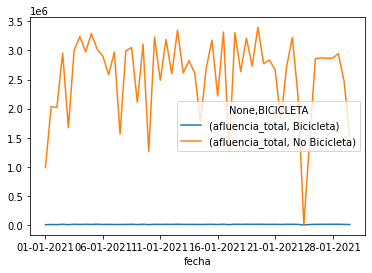

In [ ]:
df[["afluencia_total", "fecha", "BICICLETA"]].groupby(["fecha", "BICICLETA"]).sum().unstack().plot()

In [ ]:
temp_df = df[["AFLUENCIA TOTAL\n(cifras preliminares)", "FECHA", "BICICLETA"]].groupby(["FECHA", "BICICLETA"]).sum()
temp_df = temp_df.reset_index()
temp_df.head()

KeyError: ignored

In [ ]:
import plotly.express as px

fig = px.line(temp_df, x="FECHA", y="AFLUENCIA TOTAL\n(cifras preliminares)", color='BICICLETA')
fig.show()

NameError: ignored

In [ ]:
def leer_historico_ecobici(anio, mes):
  import requests
  csv_url = f"https://www.ecobici.cdmx.gob.mx/sites/default/files/data/usages/{anio}-{mes}.csv"
  req = requests.get(csv_url)
  url_content = req.content
  rawData = pd.read_csv(io.StringIO(url_content.decode('utf-8')))
  return rawData

In [ ]:
consultas = [
  (2021, "05"),
  (2021, "04"),
  (2021, "03"),
  (2021, "02"),
  (2021, "01"),
  #(2020, "12"),
 (2020, "11"),
  
  (2020, "10"),
  (2020, "09"),
  (2020, "08"),
  (2020, "07"),
  (2020, "06"),
  (2020, "05"),
  (2020, "04"),
  (2020, "03"),
  (2020, "02"),
  (2020, "01"),
  (2019, "12"),
  (2019, "11"),
  (2019, "10"),
  (2019, "09"),
  (2019, "08"),
  (2019, "07"),
  (2019, "06"),
  (2019, "05"),
  (2019, "04"),
  (2019, "03"),
  (2019, "02"),
  (2019, "01"),

]

In [ ]:
ecobici = []
for consulta in consultas:
  print(consulta)
  ecobici.append(leer_historico_ecobici(*consulta))

(2021, '05')
(2021, '04')
(2021, '03')
(2021, '02')
(2021, '01')
(2020, '11')
(2020, '10')
(2020, '09')
(2020, '08')
(2020, '07')
(2020, '06')
(2020, '05')
(2020, '04')
(2020, '03')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.


(2020, '02')
(2020, '01')
(2019, '12')
(2019, '11')
(2019, '10')
(2019, '09')
(2019, '08')
(2019, '07')
(2019, '06')
(2019, '05')
(2019, '04')
(2019, '03')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DtypeWarning: Columns (2,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.


(2019, '02')
(2019, '01')


In [ ]:
%%time
ecobici_df = pd.DataFrame({})
for df_temp in ecobici:
  #df_temp["Fecha_Retiro"] = pd.to_datetime(df_temp["Fecha_Retiro"] + " " + df_temp["Hora_Retiro"])
  #df_temp["Fecha_Arribo"] = pd.to_datetime(df_temp["Fecha_Arribo"] + " " + df_temp["Hora_Arribo"])
  ecobici_df = ecobici_df.append(df_temp)

CPU times: user 16 s, sys: 1.94 s, total: 17.9 s
Wall time: 17.7 s


In [ ]:
ecobici_df.shape

(13815219, 14)

In [ ]:
ecobici_df[ecobici_df.Genero_Usuario =="M"]

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora Arribo,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,BikeID,Unnamed: 9
0,M,25.0,9119.0,256.0,30/04/2021,11:34:32,328.0,01/05/2021,12:00:05,NaN,NaN,NaN,NaN,NaN
2,M,35.0,12349.0,131.0,30/04/2021,11:55:52,133.0,01/05/2021,12:00:46,NaN,NaN,NaN,NaN,NaN
4,M,28.0,6801.0,1.0,30/04/2021,11:56:33,18.0,01/05/2021,12:01:25,NaN,NaN,NaN,NaN,NaN
5,M,34.0,11427.0,43.0,30/04/2021,11:48:58,97.0,01/05/2021,12:01:29,NaN,NaN,NaN,NaN,NaN
6,M,26.0,15203.0,160.0,30/04/2021,11:36:24,190.0,01/05/2021,12:02:50,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697282,M,29.0,10582,226.0,30/01/2019,23:58:02,NaN,NaN,NaN,209,31/01/2019,0:17:48,NaN,NaN
697283,M,60.0,7864,270.0,30/01/2019,23:58:13,NaN,NaN,NaN,9,31/01/2019,0:18:11,NaN,NaN
697285,M,37.0,2238,270.0,30/01/2019,23:58:25,NaN,NaN,NaN,263,31/01/2019,0:08:46,NaN,NaN
697286,M,21.0,2591,182.0,30/01/2019,23:58:25,NaN,NaN,NaN,286,31/01/2019,0:44:01,NaN,NaN


In [ ]:
print(ecobici_df.isnull().sum())
print(ecobici_df.isnull().sum()/ecobici_df.shape[0])


Genero_Usuario             243207
Edad_Usuario                   44
Bici                           44
Id_Usuario               12735996
Ciclo_Estacion_Retiro          44
Fecha_Retiro                   44
Hora_Retiro                    44
Ciclo_EstacionArribo     12735996
Fecha Arribo             12735996
Hora Arribo              12735996
Ciclo_Estacion_Arribo     1079223
Fecha_Arribo              1079223
Hora_Arribo               1079223
BikeID                   13548281
Unnamed: 9               13815218
dtype: int64
Genero_Usuario           0.017604
Edad_Usuario             0.000003
Bici                     0.000003
Id_Usuario               0.921882
Ciclo_Estacion_Retiro    0.000003
Fecha_Retiro             0.000003
Hora_Retiro              0.000003
Ciclo_EstacionArribo     0.921882
Fecha Arribo             0.921882
Hora Arribo              0.921882
Ciclo_Estacion_Arribo    0.078118
Fecha_Arribo             0.078118
Hora_Arribo              0.078118
BikeID                   0.980678
U

In [ ]:
ecobici_df.columns

Index(['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Id_Usuario',
       'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro',
       'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora Arribo',
       'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo', 'BikeID',
       'Unnamed: 9'],
      dtype='object')

In [ ]:
ecobici_df.drop(columns=["BikeID", "Unnamed: 9"], inplace = True)

In [ ]:
print(ecobici_df.shape)
ecobici_df.dropna(inplace=True)
ecobici_df.shape

(13815219, 13)


(0, 13)

In [ ]:
ecobici_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genero_Usuario         0 non-null      object 
 1   Edad_Usuario           0 non-null      float64
 2   Bici                   0 non-null      object 
 3   Id_Usuario             0 non-null      float64
 4   Ciclo_Estacion_Retiro  0 non-null      float64
 5   Fecha_Retiro           0 non-null      object 
 6   Hora_Retiro            0 non-null      object 
 7   Ciclo_EstacionArribo   0 non-null      float64
 8   Fecha Arribo           0 non-null      object 
 9   Hora Arribo            0 non-null      object 
 10  Ciclo_Estacion_Arribo  0 non-null      object 
 11  Fecha_Arribo           0 non-null      object 
 12  Hora_Arribo            0 non-null      object 
dtypes: float64(4), object(9)
memory usage: 0.0+ bytes


#### Descargar ubicaciones ECOBICI


In [ ]:
url = "https://datos.cdmx.gob.mx/explore/dataset/estaciones-de-ecobici/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C"
estaciones_request = requests.get(url)
estaciones_content = estaciones_request.content
estaciones_df = pd.read_csv(io.StringIO(estaciones_content.decode("utf-8")))
estaciones_df.head()

ParserError: ignored

In [ ]:
import pandas as pd
datos_c_estaciones_url = "https://datos.cdmx.gob.mx/dataset/a9a12b2d-7681-40cb-bf8a-2a665fc4f782/resource/0e5da76b-e551-40ee-9b8c-692167d1fa61/download/estaciones-de-ecobici.csv"
estaciones_df = pd.read_csv(datos_c_estaciones_url)

In [ ]:
estaciones_df.columns

Index(['id', 'name', 'address', 'addressnumber', 'zipcode', 'districtcode',
       'districtname', 'altitude', 'nearbystations_0', 'location_lat',
       'location_lon', 'stationtype', 'nearbystations_1', 'nearbystations_2',
       'nearbystations_3', 'nearbystations_4', 'nearbystations_5',
       'punto_geo'],
      dtype='object')

In [ ]:
estaciones_df = estaciones_df[["ID", "Colonia", "location/lat",	"location/lon"]]

In [ ]:
### Descargar ubicaciones ECOBICI

In [ ]:
ecobici_df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,BikeID,Unnamed: 9
0,M,37.0,6958,470.0,01/10/2020,5:52:34,271,01/10/2020,6:09:22,NaN,NaN
1,M,44.0,11618,128.0,01/10/2020,7:02:04,132,01/10/2020,7:05:23,NaN,NaN
2,M,59.0,10511,390.0,01/10/2020,7:26:31,305,01/10/2020,7:39:34,NaN,NaN
3,F,30.0,8660,168.0,01/10/2020,7:43:08,60,01/10/2020,7:53:42,NaN,NaN
4,F,40.0,10041,412.0,01/10/2020,7:50:43,443,01/10/2020,7:55:05,NaN,NaN


In [ ]:
ecobici_df

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,37.0,6958,470.0,01/10/2020,5:52:34,271,01/10/2020,6:09:22
1,M,44.0,11618,128.0,01/10/2020,7:02:04,132,01/10/2020,7:05:23
2,M,59.0,10511,390.0,01/10/2020,7:26:31,305,01/10/2020,7:39:34
3,F,30.0,8660,168.0,01/10/2020,7:43:08,60,01/10/2020,7:53:42
4,F,40.0,10041,412.0,01/10/2020,7:50:43,443,01/10/2020,7:55:05
...,...,...,...,...,...,...,...,...,...
697284,F,35.0,11497,359.0,30/01/2019,23:58:23,366,31/01/2019,0:07:47
697285,M,37.0,2238,270.0,30/01/2019,23:58:25,263,31/01/2019,0:08:46
697286,M,21.0,2591,182.0,30/01/2019,23:58:25,286,31/01/2019,0:44:01
697287,M,25.0,9121,137.0,30/01/2019,23:59:04,125,31/01/2019,0:01:57


In [ ]:
def calcular_escala(valores, lim = 10):
  return (valores / max(valores.max(), lim) *lim)

In [ ]:
def dibujar_mapa(coordenadas_origen, coordenadas_destino,valores_origen, valores_destino, valores):
  
  color = list(sns.color_palette("flare", 50).as_hex())[-1::-1]
  valores_escala = calcular_escala(valores)
  fig = go.Figure(go.Scattermapbox(
    mode = "lines",
    name = "{}|{}|{}".format(valores[0], coordenadas_origen["location/lat_retiro"][0], coordenadas_origen["location/lon_retiro"][0]),
    lat = [coordenadas_origen["location/lat_retiro"][0], coordenadas_destino["location/lat_arribo"][0]],
    lon = [coordenadas_origen["location/lon_retiro"][0], coordenadas_destino["location/lon_arribo"][0]],
    text = str(valores[0]),
    line = {'width': valores_escala[0], 'color' : color[0]}))
  

  
  for (i, coordenada_origen), (j, coordenada_destino), valor, valor_escala, color in zip(coordenadas_origen.iterrows(), coordenadas_destino.iterrows(), valores, valores_escala, color):
    if i > 0:
      fig.add_trace(go.Scattermapbox(
        mode = "lines",
        name = "{}".format(valor),
        lat =  [coordenada_origen["location/lat_retiro"], coordenada_destino["location/lat_arribo"]],
        lon = [coordenada_origen["location/lon_retiro"], coordenada_destino["location/lon_arribo"]],
        text = str(valor),
        hoverinfo = "text",
        hovertext = str(valor),
        line = {'width': valor_escala, "color":color}))

  fig.add_trace(go.Scattermapbox(
        lat=valores_origen["location/lat_retiro"],
        lon=valores_origen["location/lon_retiro"],
        mode='markers',
        name = "Origen",
        marker=go.scattermapbox.Marker(
            size=calcular_escala(valores_origen["n"], 50),
            color="white",
            opacity=0.7
        ),
        hovertext = "ID_estacion:" + valores_origen["Ciclo_Estacion_Retiro"].astype("str") + "|" + "n:" + valores_origen["n"].astype("str"),
        text='Origen',
        
    ))
  fig.add_trace(go.Scattermapbox(
        lat=valores_destino["location/lat_arribo"],
        lon=valores_destino["location/lon_arribo"],
        mode='markers',
        name = "Destino",
        marker=go.scattermapbox.Marker(
            size=calcular_escala(valores_destino["n"], 50),
            color='red',
            opacity=0.7
        ),
        text='Destino',
        hovertext = "ID_estacion:" + valores_destino["Ciclo_Estacion_Arribo"].astype("str") + "|" + "n:" + valores_origen["n"].astype("str")
    ))
  fig.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'accesstoken':token,
        'center': {'lat': np.median(coordenada_origen.T[0]), 'lon': np.median(coordenada_origen.T[1])},
        'style': "dark",
        'zoom': 13})
  fig.show()
  return(fig)




In [ ]:
ecobici_df["ruta"] = ecobici_df.Ciclo_Estacion_Retiro.astype(str) + "|" + ecobici_df.Ciclo_Estacion_Arribo.astype(str)
top_50 = ecobici_df.groupby(["ruta", "Ciclo_Estacion_Retiro", "Ciclo_Estacion_Arribo"]).size().sort_values(ascending = False)[:50]
top_50.reset_index().head()
top_50 = top_50.reset_index().rename(columns = {0:"n"}).merge(estaciones_df, how = "left", left_on = "Ciclo_Estacion_Retiro", right_on ="ID")
top_50 = top_50.merge(estaciones_df, how = "left", left_on = "Ciclo_Estacion_Arribo", right_on ="ID", suffixes=('_retiro', '_arribo'))
valores_origen = top_50[["Ciclo_Estacion_Retiro", "location/lat_retiro",	"location/lon_retiro", "n"]].groupby(["Ciclo_Estacion_Retiro", "location/lat_retiro",	"location/lon_retiro"]).sum().reset_index()
valores_destino = top_50[["Ciclo_Estacion_Arribo", "location/lat_arribo",	"location/lon_arribo", "n"]].groupby(["Ciclo_Estacion_Arribo", "location/lat_arribo",	"location/lon_arribo"]).sum().reset_index()

In [ ]:
dibujar_mapa(top_50[["location/lat_retiro", "location/lon_retiro"]], top_50[["location/lat_arribo", "location/lon_arribo"]],valores_origen,valores_destino, top_50["n"].values )

In [ ]:
top_50[top_50['Ciclo_Estacion_Arribo'] == top_50['Ciclo_Estacion_Retiro']]

,ruta,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,n,ID_retiro,Colonia_retiro,location/lat_retiro,location/lon_retiro,ID_arribo,Colonia_arribo,location/lat_arribo,location/lon_arribo
4,33.0|33,33.0,33,5050,33,Juárez,19.424234,-99.166431,33,Juárez,19.424234,-99.166431
14,27.0|27,27.0,27,3940,27,Juárez,19.429115,-99.162614,27,Juárez,19.429115,-99.162614
15,449.0|449,449.0,449,3928,449,Juárez,19.420180,-99.174393,449,Juárez,19.420180,-99.174393
16,7.0|7,7.0,7,3817,7,Cuauhtémoc,19.425468,-99.175166,7,Cuauhtémoc,19.425468,-99.175166
20,1.0|1,1.0,1,3576,1,Cuauhtémoc,19.433571,-99.167809,1,Cuauhtémoc,19.433571,-99.167809
25,139.0|139,139.0,139,3395,139,Roma Norte,19.416128,-99.162097,139,Roma Norte,19.416128,-99.162097
34,434.0|434,434.0,434,3132,434,Del Valle Sur,19.363741,-99.171268,434,Del Valle Sur,19.363741,-99.171268
36,96.0|96,96.0,96,3074,96,Centro,19.430625,-99.142480,96,Centro,19.430625,-99.142480
37,260.0|260,260.0,260,3043,260,Centro,19.435354,-99.147742,260,Centro,19.435354,-99.147742
41,34.0|34,34.0,34,2980,34,Juárez,19.424725,-99.163331,34,Juárez,19.424725,-99.163331


In [ ]:
def crear_mapa(ecobici_df, estaciones_df, n_top = 50):
  ecobici_df["ruta"] = ecobici_df.Ciclo_Estacion_Retiro.astype(str) + "|" + ecobici_df.Ciclo_Estacion_Arribo.astype(str)
  top = ecobici_df.groupby(["ruta", "Ciclo_Estacion_Retiro", "Ciclo_Estacion_Arribo"]).size().sort_values(ascending = False)[:n_top]
  top.reset_index().head()
  top = top.reset_index().rename(columns = {0:"n"}).merge(estaciones_df, how = "left", left_on = "Ciclo_Estacion_Retiro", right_on ="ID")
  top = top.merge(estaciones_df, how = "left", left_on = "Ciclo_Estacion_Arribo", right_on ="ID", suffixes=('_retiro', '_arribo'))
  valores_origen = top[["Ciclo_Estacion_Retiro", "location/lat_retiro",	"location/lon_retiro", "n"]].groupby(["Ciclo_Estacion_Retiro", "location/lat_retiro",	"location/lon_retiro"]).sum().reset_index()
  valores_destino = top[["Ciclo_Estacion_Arribo", "location/lat_arribo",	"location/lon_arribo", "n"]].groupby(["Ciclo_Estacion_Arribo", "location/lat_arribo",	"location/lon_arribo"]).sum().reset_index()
  return top,dibujar_mapa(top[["location/lat_retiro", "location/lon_retiro"]], top[["location/lat_arribo", "location/lon_arribo"]],valores_origen,valores_destino, top["n"].values )

In [ ]:
ecobici_df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,ruta
0,M,37.0,6958,470.0,01/10/2020,5:52:34,271,01/10/2020,6:09:22,470.0|271
1,M,44.0,11618,128.0,01/10/2020,7:02:04,132,01/10/2020,7:05:23,128.0|132
2,M,59.0,10511,390.0,01/10/2020,7:26:31,305,01/10/2020,7:39:34,390.0|305
3,F,30.0,8660,168.0,01/10/2020,7:43:08,60,01/10/2020,7:53:42,168.0|60
4,F,40.0,10041,412.0,01/10/2020,7:50:43,443,01/10/2020,7:55:05,412.0|443


In [ ]:
top_50, _ = crear_mapa(ecobici_df[ecobici_df["Genero_Usuario"] == "M"].copy(), estaciones_df)

In [ ]:
top_50, _ = crear_mapa(ecobici_df[ecobici_df["Genero_Usuario"] == "F"].copy(), estaciones_df)


In [ ]:
top_50, _ = crear_mapa(ecobici_df[ecobici_df['Edad_Usuario'] > 60].copy(), estaciones_df)


In [ ]:
ecobici_df.Fecha_Retiro.str.slice(6).astype("int")

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
697284    2019
697285    2019
697286    2019
697287    2019
697288    2019
Name: Fecha_Retiro, Length: 11838575, dtype: int64

In [ ]:
top_50, _ = crear_mapa(ecobici_df[ecobici_df.Fecha_Retiro.str.slice(6).astype("int") == 2020].copy(), estaciones_df)


In [ ]:
top_50, _ = crear_mapa(ecobici_df[ecobici_df.Fecha_Retiro.str.slice(6).astype("int") == 2019].copy(), estaciones_df)




> Arturo Téllez  tellez.cortes.arturo@gmail.com



